<img src="./img/championcurse.jpg" align="middle"></img>
<h1 align="middle" style="font-size: 30px; font-family:ariel-black">An Analysis of FIFA World Cup Champion's Curse</h1><br>

<body>
    
<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px"> FIFA World Cup is one of the most prestigious tournaments in the world. According to FIFA themselves, more than hald the word watched the 2018 World Cup held in Russia. For the 2022 championship, FIFA added more teams to the tournament. It increased the number of teams from 32 to 48. </p>

<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">In recent World Cup tournaments, viewers and sport media noticed an unusual trend. A trend that would eventually be known as the "Champion's Curse" or "The World Cup Curse".</p>

<p align="left" style="font-size: 23px;"><b>What is the Champion's Curse?</b></p>

<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">Since 2002, winners of the tournaments would always be eliminated in the groups stage in the next World Cup. As an example, When France won the 1998 World Cup, they were eliminated in 2002 World Cup before advancing to the knockout stage. Most recent example is Germany, when they won the 2014 World Cup and were eliminated in the groups stage in 2018. This "curse" affected multiple title defenders throughout championships from 1998 to 2018. The only team that broken the curse were Brazil in 2004 after they won the 2002 World Cup. In the next World Cup they performed better than other championship defenders by reaching the knockout stage. (<a href="https://en.wikipedia.org/wiki/Sports-related_curses#World_Cup_champion%27s_Curse">read more</a>) </p>

<p align="left" style="font-size: 23px;"><b>The Attack Plan</b></p>
<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">In this project I attempt to find a logical reason behind this trend. The goal is to compare the efficiency of the affected teams in world cup matches and international matches between each championship. I've decided to include Brazil even though they haven't been "cursed" for the purpose of comparison. Additionally I still want to look into their defeat in the 2004 World Cup even if it's not in group stages.</p>
<hr>
<p align="left" style="font-size: 23px;"><b>Data Collection</b></p>
<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">I obtained the datasets from Kraggle. I found two datasets that collect data for international matches (Source: <a href="https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017">kaggle.com</a>) and World Cup matches (Source: <a href="https://www.kaggle.com/abecklas/fifa-world-cup">kaggle.com</a>).</p>

</body>

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
mpl.style.use('seaborn-poster')

world_cup = pd.read_csv("WorldCupMatches.csv")
intl_matches = pd.read_csv("results.csv")

<p align="left" style="font-size: 23px;"><b>Data Tidying & Processing</b></p>
<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">Now that I collected data from each dataset, I will perform the following steps to obtain the information I need: 

<ol align='left' style="font-size: 20px; font-family:georgia; line-height:30px">
    <li>Get Data for each of the following teams from each database: Germany (GER), France (FRA), Brazil (BRA), Spain (ESP), and Italy (ITA)</li>
    <li>Dropping unnecessary columns and converting data to more convenient types (if necessary)</li>
    <li>Add a column for the winner of matches:
        <ul>
            <li>True: team being studied won the match</li>
            <li>False: team being studied lost or tied the match</li>
        </ul>
    </li>
    <li>Create a new DataFrame to include win rate and number of goals for each team every year and every World Cup</li>
</ol></p>
<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">
I'm also including an extra variable to hold specific information about Germany's international matches. More on this later.
</p>

In [181]:
# obtaining data for individual teams from each data base:

##########################################################
##### World Cup data for GER, FRA, BRA, ESP, and ITA #####
##########################################################

GER_wc = world_cup[(world_cup['Home Team Initials'] == "GER") | (world_cup['Away Team Initials'] == 'GER')]
FRA_wc = world_cup[(world_cup['Home Team Initials'] == "FRA") | (world_cup['Away Team Initials'] == 'FRA')]
BRA_wc = world_cup[(world_cup['Home Team Initials'] == "BRA") | (world_cup['Away Team Initials'] == 'BRA')]
ESP_wc = world_cup[(world_cup['Home Team Initials'] == "ESP") | (world_cup['Away Team Initials'] == 'ESP')]
ITA_wc = world_cup[(world_cup['Home Team Initials'] == "ITA") | (world_cup['Away Team Initials'] == 'ITA')]

# droppping unused columns

GER_wc = GER_wc.drop(['Datetime', 'Stage', 'Stadium', 'City', 'Win conditions', 
             'Attendance', 'Half-time Home Goals', 'Half-time Away Goals', 'Referee', 'Assistant 1',
             'Assistant 2', 'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'], axis=1)
FRA_wc = FRA_wc.drop(['Datetime', 'Stage', 'Stadium', 'City', 'Win conditions', 
             'Attendance', 'Half-time Home Goals', 'Half-time Away Goals', 'Referee', 'Assistant 1',
             'Assistant 2', 'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'], axis=1)
BRA_wc = BRA_wc.drop(['Datetime', 'Stage', 'Stadium', 'City', 'Win conditions', 
             'Attendance', 'Half-time Home Goals', 'Half-time Away Goals', 'Referee', 'Assistant 1',
             'Assistant 2', 'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'], axis=1)
ESP_wc = ESP_wc.drop(['Datetime', 'Stage', 'Stadium', 'City', 'Win conditions', 
             'Attendance', 'Half-time Home Goals', 'Half-time Away Goals', 'Referee', 'Assistant 1',
             'Assistant 2', 'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'], axis=1)
ITA_wc = ITA_wc.drop(['Datetime', 'Stage', 'Stadium', 'City', 'Win conditions', 
             'Attendance', 'Half-time Home Goals', 'Half-time Away Goals', 'Referee', 'Assistant 1',
             'Assistant 2', 'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'], axis=1)

# converting year, home team goals and away team goals from float to int
GER_wc['Year'] = GER_wc['Year'].astype('int') 
GER_wc['Home Team Goals'] = GER_wc['Home Team Goals'].astype('int') 
GER_wc['Away Team Goals'] = GER_wc['Away Team Goals'].astype('int') 

FRA_wc['Year'] = FRA_wc['Year'].astype('int') 
FRA_wc['Home Team Goals'] = FRA_wc['Home Team Goals'].astype('int') 
FRA_wc['Away Team Goals'] = FRA_wc['Away Team Goals'].astype('int')  

BRA_wc['Year'] = BRA_wc['Year'].astype('int')
BRA_wc['Home Team Goals'] = BRA_wc['Home Team Goals'].astype('int') 
BRA_wc['Away Team Goals'] = BRA_wc['Away Team Goals'].astype('int') 

ESP_wc['Year'] = ESP_wc['Year'].astype('int')
ESP_wc['Home Team Goals'] = ESP_wc['Home Team Goals'].astype('int') 
ESP_wc['Away Team Goals'] = ESP_wc['Away Team Goals'].astype('int') 

ITA_wc['Year'] = ITA_wc['Year'].astype('int') 
ITA_wc['Home Team Goals'] = ITA_wc['Home Team Goals'].astype('int') 
ITA_wc['Away Team Goals'] = ITA_wc['Away Team Goals'].astype('int')  

# adding a column for winner:
# True: if team being studied won, False: if team being studied lost or tied

GER_wc['Winner'] = ((GER_wc['Home Team Name'] == 'Germany') & (GER_wc['Home Team Goals'] > GER_wc['Away Team Goals'])) | ((GER_wc['Away Team Name'] == 'Germany') & (GER_wc['Away Team Goals'] > GER_wc['Home Team Goals']))
FRA_wc['Winner'] = ((FRA_wc['Home Team Name'] == 'France') & (FRA_wc['Home Team Goals'] > FRA_wc['Away Team Goals'])) | ((FRA_wc['Away Team Name'] == 'France') & (FRA_wc['Away Team Goals'] > FRA_wc['Home Team Goals']))
BRA_wc['Winner'] = ((BRA_wc['Home Team Name'] == 'Brazil') & (BRA_wc['Home Team Goals'] > BRA_wc['Away Team Goals'])) | ((BRA_wc['Away Team Name'] == 'Brazil') & (BRA_wc['Away Team Goals'] > BRA_wc['Home Team Goals']))
ESP_wc['Winner'] = ((ESP_wc['Home Team Name'] == 'Spain') & (ESP_wc['Home Team Goals'] > ESP_wc['Away Team Goals'])) | ((ESP_wc['Away Team Name'] == 'Spain') & (ESP_wc['Away Team Goals'] > ESP_wc['Home Team Goals']))
ITA_wc['Winner'] = ((ITA_wc['Home Team Name'] == 'Italy') & (ITA_wc['Home Team Goals'] > ITA_wc['Away Team Goals'])) | ((ITA_wc['Away Team Name'] == 'Italy') & (ITA_wc['Away Team Goals'] > ITA_wc['Home Team Goals']))

GER_wc.head()

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Winner
22,1934,Germany,5,2,Belgium,True
27,1934,Germany,2,1,Sweden,True
32,1934,Czechoslovakia,3,1,Germany,False
33,1934,Germany,3,2,Austria,True
35,1938,Switzerland,1,1,Germany,False


In [183]:
######################################################################
##### International matches data for GER, FRA, BRA, ESP, and ITA #####
######################################################################

GER_intl = intl_matches[(intl_matches['home_team'] == "Germany") | (intl_matches['away_team'] == 'Germany')]
FRA_intl = intl_matches[(intl_matches['home_team'] == "France") | (intl_matches['away_team'] == 'France')]
BRA_intl = intl_matches[(intl_matches['home_team'] == "Brazil") | (intl_matches['away_team'] == 'Brazil')]
ESP_intl = intl_matches[(intl_matches['home_team'] == "Spain") | (intl_matches['away_team'] == 'Spain')]
ITA_intl = intl_matches[(intl_matches['home_team'] == "Italy") | (intl_matches['away_team'] == 'Italy')]

# droppping unused columns

GER_intl = GER_intl.drop(['city', 'country', 'neutral'], axis=1)
FRA_intl = FRA_intl.drop(['city', 'country', 'neutral'], axis=1)
BRA_intl = BRA_intl.drop(['city', 'country', 'neutral'], axis=1)
ESP_intl = ESP_intl.drop(['city', 'country', 'neutral'], axis=1)
ITA_intl = ITA_intl.drop(['city', 'country', 'neutral'], axis=1)

# adding a column for winner:
# True: if team being studied won, False: if team being studied lost or tied

GER_intl['Winner'] = ((GER_intl['home_team'] == 'Germany') & (GER_intl['home_score'] > GER_intl['away_score'])) | ((GER_intl['away_team'] == 'Germany') & (GER_intl['away_score'] > GER_intl['home_score']))
FRA_intl['Winner'] = ((FRA_intl['home_team'] == 'France') & (FRA_intl['home_score'] > FRA_intl['away_score'])) | ((FRA_intl['away_team'] == 'France') & (FRA_intl['away_score'] > FRA_intl['home_score']))
BRA_intl['Winner'] = ((BRA_intl['home_team'] == 'Brazil') & (BRA_intl['home_score'] > BRA_intl['away_score'])) | ((BRA_intl['away_team'] == 'Brazil') & (BRA_intl['away_score'] > BRA_intl['home_score']))
ESP_intl['Winner'] = ((ESP_intl['home_team'] == 'Spain') & (ESP_intl['home_score'] > ESP_intl['away_score'])) | ((ESP_intl['away_team'] == 'Spain') & (ESP_intl['away_score'] > ESP_intl['home_score']))
ITA_intl['Winner'] = ((ITA_intl['home_team'] == 'Italy') & (ITA_intl['home_score'] > ITA_intl['away_score'])) | ((ITA_intl['away_team'] == 'Italy') & (ITA_intl['away_score'] > ITA_intl['home_score']))

# Temporary variable to keep specific data on Germany's international matches (more on this later)
w_GER = pd.DataFrame(GER_intl[GER_intl['tournament'] == "FIFA World Cup"])

# removing World Cup matches from each dataset (Goals already accounted for in other datasets)
GER_intl = GER_intl[GER_intl['tournament'] != "FIFA World Cup"]
FRA_intl = FRA_intl[FRA_intl['tournament'] != "FIFA World Cup"]
BRA_intl = BRA_intl[BRA_intl['tournament'] != "FIFA World Cup"]
ESP_intl = ESP_intl[ESP_intl['tournament'] != "FIFA World Cup"]
ITA_intl = ITA_intl[ITA_intl['tournament'] != "FIFA World Cup"]

ITA_intl.head()

,date,home_team,away_team,home_score,away_score,tournament,Winner
258,5/15/1910,Italy,France,6,2,Friendly,True
260,5/26/1910,Hungary,Italy,6,1,Friendly,False
273,1/6/1911,Italy,Hungary,0,1,Friendly,False
284,4/9/1911,France,Italy,2,2,Friendly,False
289,5/7/1911,Italy,Switzerland,2,2,Friendly,False


In [184]:
# this function will collect team's international goals in one column
def getIntlGoals(data, team):
    for i, row in data.iterrows():
        if(row['home_team'] == team):
            data.loc[i, 'Goals'] = row['home_score']
        else:
            data.loc[i, 'Goals'] = row['away_score']
        
# this function has the same purpose for World Cup matches
def getWCGoals(data, team):
    for i, row in data.iterrows():
        if(row['Home Team Name'] == team):
            data.loc[i, 'Goals'] = row['Home Team Goals']
        else:
            data.loc[i, 'Goals'] = row['Away Team Goals']


getIntlGoals(GER_intl, 'Germany')
getIntlGoals(FRA_intl, 'France')
getIntlGoals(BRA_intl, 'Brazil')
getIntlGoals(ESP_intl, 'Spain')
getIntlGoals(ITA_intl, 'Italy')

# temp Germany dataset
getIntlGoals(w_GER, 'Germany')

getWCGoals(GER_wc, 'Germany')
getWCGoals(FRA_wc, 'France')
getWCGoals(BRA_wc, 'Brazil')
getWCGoals(ESP_wc, 'Spain')
getWCGoals(ITA_wc, 'Italy')
            
# this function will add a new column for the year in the international matches datasets
def getYear(data):
    for i, row in data.iterrows():
        data.loc[i, 'Year'] = int(row['date'][-4:])

getYear(GER_intl)
getYear(FRA_intl)
getYear(BRA_intl)
getYear(ESP_intl)
getYear(ITA_intl)

# temp Germany dataset
getYear(w_GER)

GER_intl.head()

,date,home_team,away_team,home_score,away_score,tournament,Winner,Goals,Year
209,4/5/1908,Switzerland,Germany,5,3,Friendly,False,3.0,1908.0
216,6/7/1908,Austria,Germany,3,2,Friendly,False,2.0,1908.0
234,4/4/1909,Germany,Switzerland,1,0,Friendly,True,1.0,1909.0
235,4/4/1909,Hungary,Germany,3,3,Friendly,False,3.0,1909.0
253,4/3/1910,Switzerland,Germany,2,3,Friendly,True,3.0,1910.0


<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">Now that I have a dataset for each team's number of goals in one column and a year column for international matches, I can remove all columns and keep the year, team's win mark, and number of goals. And from this dataset, I'll create a dataset to include team's win rate and total number of goals in one DataFrame</p>

In [185]:
# World Cup column drops
GER_wc.drop(['Home Team Name', 'Home Team Goals', 'Away Team Goals', 'Away Team Name'], axis=1, inplace=True)
FRA_wc.drop(['Home Team Name', 'Home Team Goals', 'Away Team Goals', 'Away Team Name'], axis=1, inplace=True)
BRA_wc.drop(['Home Team Name', 'Home Team Goals', 'Away Team Goals', 'Away Team Name'], axis=1, inplace=True)
ESP_wc.drop(['Home Team Name', 'Home Team Goals', 'Away Team Goals', 'Away Team Name'], axis=1, inplace=True)
ITA_wc.drop(['Home Team Name', 'Home Team Goals', 'Away Team Goals', 'Away Team Name'], axis=1, inplace=True)

# International matches column drops
GER_intl.drop(['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament'], axis=1, inplace=True)
FRA_intl.drop(['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament'], axis=1, inplace=True)
BRA_intl.drop(['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament'], axis=1, inplace=True)
ESP_intl.drop(['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament'], axis=1, inplace=True)
ITA_intl.drop(['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament'], axis=1, inplace=True)

# resetting indexes
GER_wc.reset_index(drop=True, inplace=True)
FRA_wc.reset_index(drop=True, inplace=True)
BRA_wc.reset_index(drop=True, inplace=True)
ESP_wc.reset_index(drop=True, inplace=True)
ITA_wc.reset_index(drop=True, inplace=True)

GER_intl.reset_index(drop=True, inplace=True)
FRA_intl.reset_index(drop=True, inplace=True)
BRA_intl.reset_index(drop=True, inplace=True)
ESP_intl.reset_index(drop=True, inplace=True)
ITA_intl.reset_index(drop=True, inplace=True)

# temp Germany dataset
w_GER.reset_index(drop=True, inplace=True)

ITA_intl.head()

,Winner,Goals,Year
0,True,6.0,1910.0
1,False,1.0,1910.0
2,False,0.0,1911.0
3,False,2.0,1911.0
4,False,2.0,1911.0


In [186]:
# Now to create DataFrames for each team's performance every year and every World Cup
columns = ['Year', 'Team', 'Win Rate', 'Total Goals']

# function to add information (Total Goals and Win Rate) to the team's overall dataset in World Cup championships
def getData(data, og_data, team):
    for i, row in og_data.iterrows():
        data.loc[i, 'Year'] = row['Year']
        data.loc[i, 'Win Rate'] = (len(og_data[(og_data['Year'] == row['Year']) & (og_data['Winner'])]) / len(og_data[og_data['Year'] == row['Year']])) * 100
        data.loc[i, 'Total Goals'] = og_data[og_data['Year'] == row['Year']]['Goals'].sum()
        data['Team'] = team
        
##############################
##### World Cup dataset ######
##############################

GER_wc_wr = pd.DataFrame(columns=columns)
FRA_wc_wr = pd.DataFrame(columns=columns)
BRA_wc_wr = pd.DataFrame(columns=columns)
ESP_wc_wr = pd.DataFrame(columns=columns)
ITA_wc_wr = pd.DataFrame(columns=columns)

# adding win rate and goals information to World Cup datasets
getData(GER_wc_wr, GER_wc, 'Germany')
getData(FRA_wc_wr, FRA_wc, 'France')
getData(BRA_wc_wr, BRA_wc, 'Brazil')
getData(ESP_wc_wr, ESP_wc, 'Spain')
getData(ITA_wc_wr, ITA_wc, 'Italy')        
        
# removing duplicates
GER_wc_wr.drop_duplicates(inplace=True)
FRA_wc_wr.drop_duplicates(inplace=True)
BRA_wc_wr.drop_duplicates(inplace=True)
ESP_wc_wr.drop_duplicates(inplace=True)
ITA_wc_wr.drop_duplicates(inplace=True)

# now to create the overall dataset for all teams
datasets = [GER_wc_wr, FRA_wc_wr, BRA_wc_wr, ESP_wc_wr, ITA_wc_wr]
wc = pd.concat(datasets).sort_values(by='Year').reset_index(drop=True)

wc.head()

,Year,Team,Win Rate,Total Goals
0,1930,Brazil,50,5
1,1930,France,33.3333,4
2,1934,Germany,75,11
3,1934,Spain,33.3333,4
4,1934,Italy,80,12


In [187]:
#########################################
##### International Matches dataset #####
#########################################

GER_intl_wr = pd.DataFrame(columns=columns)
FRA_intl_wr = pd.DataFrame(columns=columns)
BRA_intl_wr = pd.DataFrame(columns=columns)
ESP_intl_wr = pd.DataFrame(columns=columns)
ITA_intl_wr = pd.DataFrame(columns=columns)

# temp Germany dataset
w_GER_wr = pd.DataFrame(columns=columns)

# adding win rate and goals information to international matches datasets
getData(GER_intl_wr, GER_intl, 'Germany')
getData(FRA_intl_wr, FRA_intl, 'France')
getData(BRA_intl_wr, BRA_intl, 'Brazil')
getData(ESP_intl_wr, ESP_intl, 'Spain')
getData(ITA_intl_wr, ITA_intl, 'Italy')

# temp Germany dataset
getData(w_GER_wr, w_GER, 'Germany')

# removing duplicates
GER_intl_wr.drop_duplicates(inplace=True)
FRA_intl_wr.drop_duplicates(inplace=True)
BRA_intl_wr.drop_duplicates(inplace=True)
ESP_intl_wr.drop_duplicates(inplace=True)
ITA_intl_wr.drop_duplicates(inplace=True)

# temp Germany dataset
w_GER_wr.drop_duplicates(inplace=True)

# now to create the overall dataset for all teams
datasets = [GER_intl_wr, FRA_intl_wr, BRA_intl_wr, ESP_intl_wr, ITA_intl_wr]
intl = pd.concat(datasets).sort_values(by='Year').reset_index(drop=True)

intl.head()

,Year,Team,Win Rate,Total Goals
0,1904,France,0,3
1,1905,France,50,1
2,1906,France,0,0
3,1907,France,100,2
4,1908,Germany,0,5


<p align="left" style="font-size: 23px;"><b>Special Case: West Germany</b></p>
<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">Germany is a special case. There is a big gap in its World Cup matches data from 1938 to 1994. This is because during the Cold War era, Germany participated in the World Cup as West Germany, and the World Cup matches dataset is missing that information. Luckily, the international matches dataset has the missing data. For the purpose of this project I will consider them to be one country. So I will add them to the World Cup dataset. I have been performing all the steps on a temporary variable I called <font style='font-family: courier'>w_GER</font> for this reason. All I have to do is merge it with the dataset I created for the World Cup.</p>

In [189]:
##################################
##### Germany's Special Case #####
##################################

# getting World Cup matches data from 1938 to 1990
tmp = pd.DataFrame(w_GER_wr[(w_GER_wr['Year'] > 1934) & (w_GER_wr['Year'] < 1994)])

# merging the two datasets
datasets = [wc, tmp]
wc = pd.concat(datasets).sort_values(by='Year').reset_index(drop=True)
wc.drop_duplicates(inplace=True)

print("Missing data:")
tmp

Missing data:


,Year,Team,Win Rate,Total Goals
4,1938,Germany,0,3
6,1954,Germany,83.3333,25
12,1958,Germany,33.3333,12
18,1962,Germany,50,4
22,1966,Germany,66.6667,15
28,1970,Germany,83.3333,17
34,1974,Germany,85.7143,13
41,1978,Germany,16.6667,10
47,1982,Germany,42.8571,12
54,1986,Germany,42.8571,8


<p align="left" style="font-size: 23px;"><b>Data Visualization</b></p>
<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">Now I have two datasets that include information about each team's win rate and total number of goals every year for international matches and World Cup matches. It is time to plot some data to look for trends and patterns. I will produce plots for the following: 
<ul align='left' style="font-size: 20px; font-family:georgia; line-height:30px"><li>Team's win rate against each other in international matches and World Cups</li><li>Goals vs. Win Rate for each team in international matches and World Cups</li></ul></p>

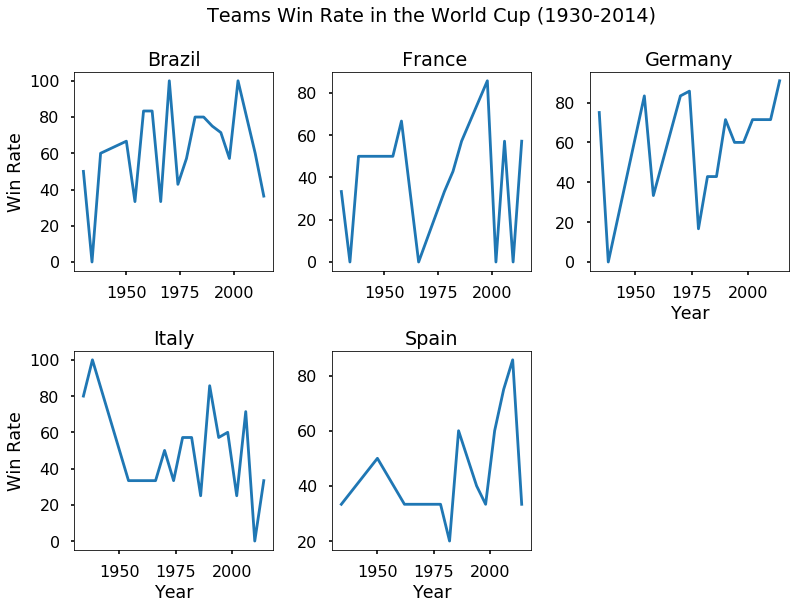

In [217]:
#############################
#####  World Cup plots  #####
##### Win Rate vs. Year #####
#############################

wc_fig = plt.figure(1)
i = 231

for team in np.unique(wc['Team'].values):
    data = wc[wc['Team'] == team]
    plt.subplot(i)
    plt.plot(data['Year'], data['Win Rate'], label=team)
    plt.title(team)
    if(i == 232):
        plt.title("Teams Win Rate in the World Cup (1930-2014)\n\n France")
    if(i == 231 or i == 234):
        plt.ylabel("Win Rate")
    if(i == 233 or i == 234 or i == 235):
        plt.xlabel("Year") 
    i += 1

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">It is clear from these plots that Brazil has better win rates over the years compared to other teams. Their win rate never goes below %33 after 1938. They also had a %100 win rate in the years 1970 and 2002, in which Brazil had won the World Cup. It is no surprise that win rate has a direct correlation with winning the World Cup.</p> 
    
<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px"> Germany also has a generally high win rate. After the large dip in 1978, Germany had seen a steady improvment in their win rate.</p>

<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">It is worth mentioning that Germany did not participate in 1950. And that the World Cup was cancelled entirely in 1942 and 1946 due to the Second World War (<a href="https://theculturetrip.com/europe/germany/articles/why-wasnt-there-a-world-cup-in-1942-or-1946/">read more</a>)</p>
    
<p align='left' style="font-size: 20px; font-family:georgia; line-height:30px">These subplots were produces for the purpose of checking the data and making sure it makes sense with factual data (and they are fun to check out!)</p>


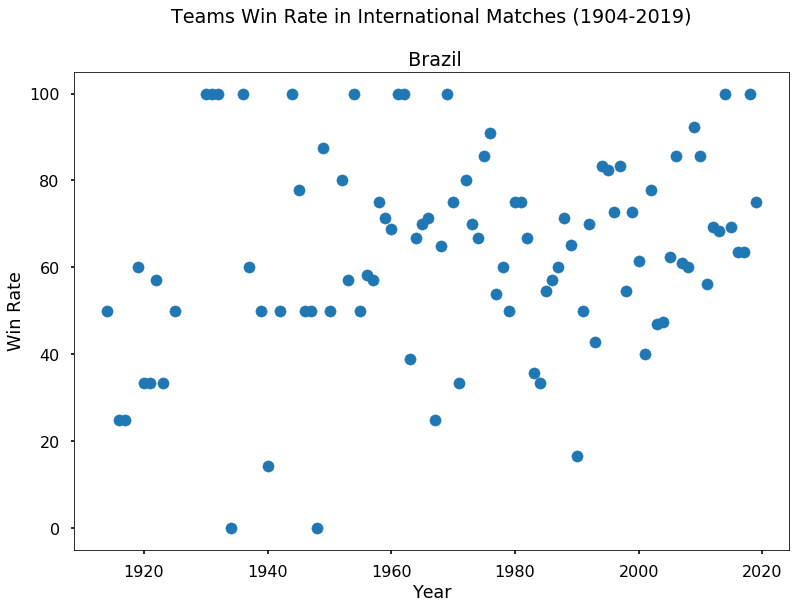

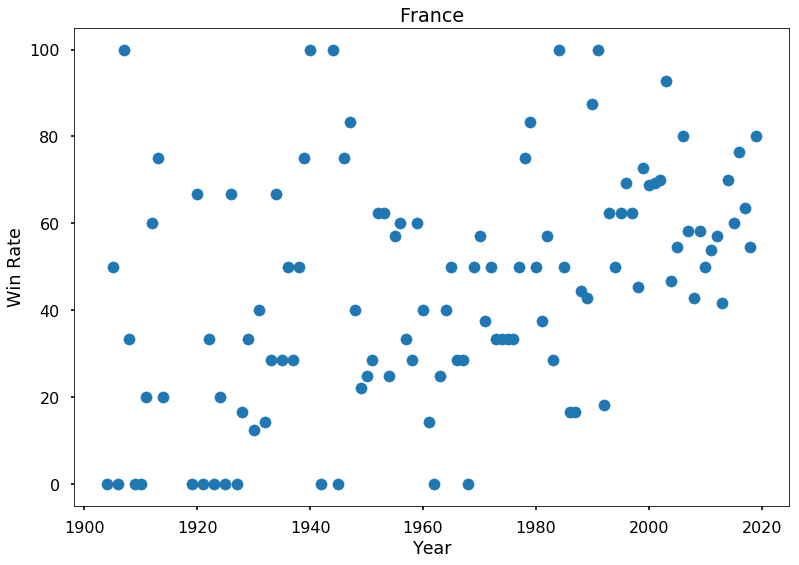

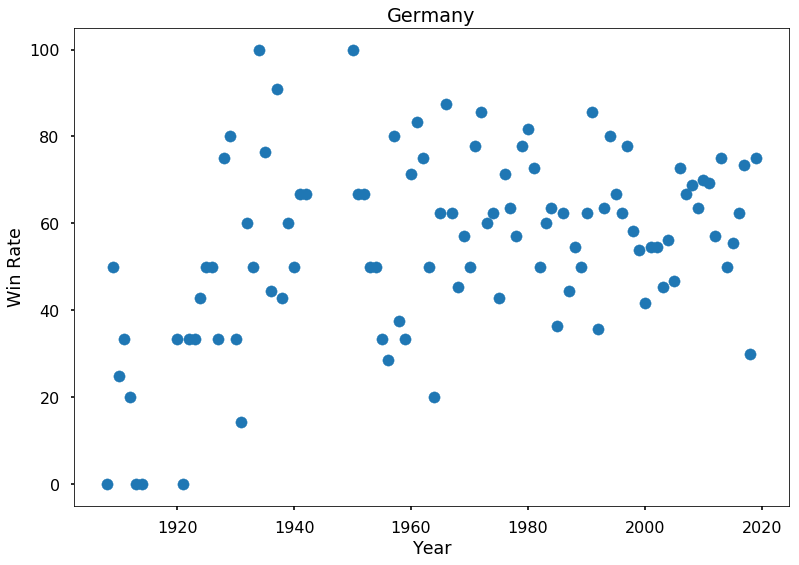

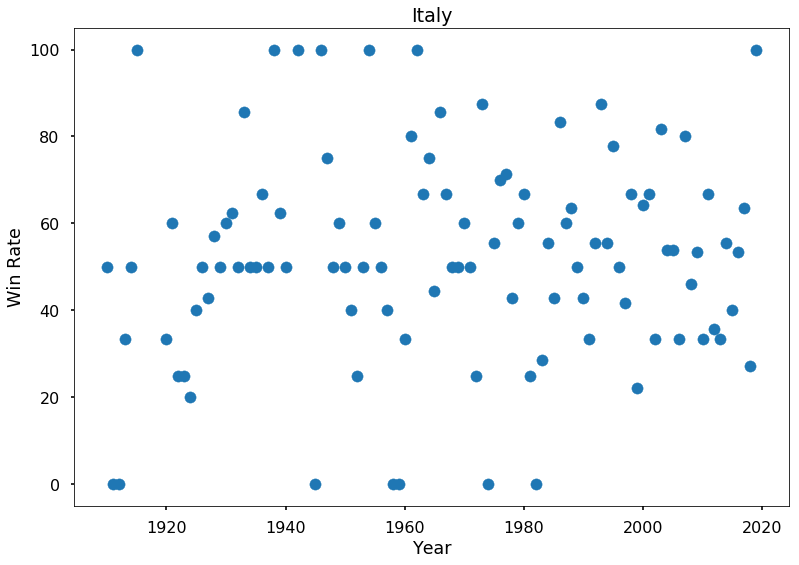

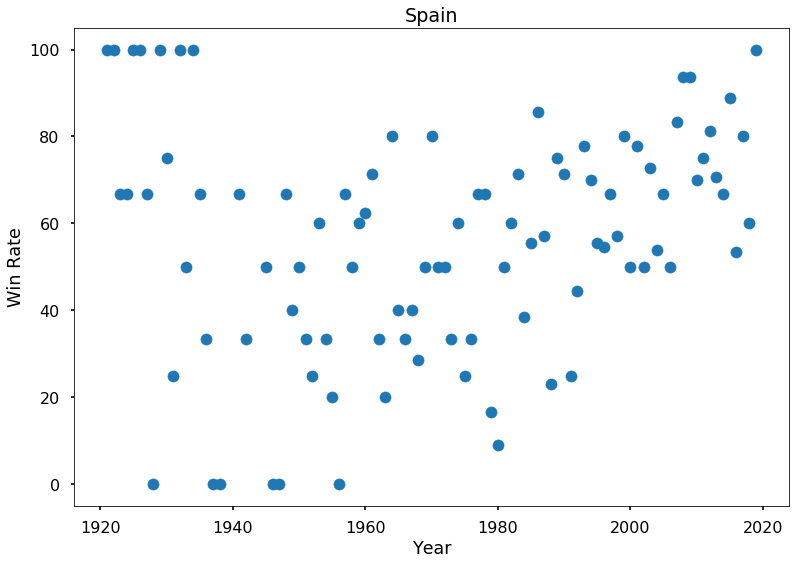

In [208]:
#########################################
#####  International Matches plots  #####
#####       Win Rate vs. Year       #####
#########################################

i = 1
for team in np.unique(wc['Team'].values):
    plt.figure(i)
    data = intl[intl['Team'] == team]
    plt.scatter(data['Year'], data['Win Rate'], label=team)
    plt.title(team)
    plt.xlabel("Year")
    plt.ylabel("Win Rate")    
    if(i == 1):
        plt.title("Teams Win Rate in International Matches (1904-2019)\n\n Brazil")
    i += 1

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()